### 이미지처리 과제 #01

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

---
##### 01_Numpy 이미지 저장

In [2]:
# 소스 불러오기
img_PIL = Image.open('../01_이미지다루기/src/lego_man.jpg').convert('L')
print('Source >> ','\n',img_PIL,'\n')

# PIL to Array
img_array = np.array(img_PIL)
print('PIL to Array >> ','\n',img_array,'\n')

# 저장
np.save('../01_이미지다루기/src/lego_man_array',img_array)

# 불러오기
img_array_save = np.load('../01_이미지다루기/src/lego_man_array.npy')
print('Save to Load >> ','\n',img_array_save,'\n')

# Array to PIL
img_change = Image.fromarray(np.uint8(img_array_save))
img_change.save('../01_이미지다루기/src/lego_man_PIL.jpg')

# Numpy vs PIL 용량
import os
np_save_size = os.path.getsize('../01_이미지다루기/src/lego_man_array.npy')
pil_save_size = os.path.getsize('../01_이미지다루기/src/lego_man_PIL.jpg')

print('Numpy Size >> ','\n',np_save_size,'bytes','\n')
print('PIL Size >> ','\n',pil_save_size,'bytes')

Source >>  
 <PIL.Image.Image image mode=L size=600x600 at 0x7F79C862A500> 

PIL to Array >>  
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] 

Save to Load >>  
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] 

Numpy Size >>  
 360128 bytes 

PIL Size >>  
 13343 bytes


___
#### 02_이미지 타입, 크기 확인 방법

##### 02_01 이미지 타입

In [3]:
# 경로 지정
image_path = '../01_이미지다루기/src/lego_man.jpg'

# 소스 불러오기
lego_man = cv2.imread(image_path)

# 타입 확인
image_type = type(lego_man)
print('이미지 타입 >> ',image_type,'\n')

# 이미지 크기 확인
image_height, image_width, image_ch = lego_man.shape
print('image_height >> ',image_height,'\n')
print('image_width >> ',image_width,'\n')
print('image_channel >> ',image_ch,'\n')


이미지 타입 >>  <class 'numpy.ndarray'> 

image_height >>  600 

image_width >>  600 

image_channel >>  3 



##### 02_02 이미지 확인

Resize Height >>  200
Resize Width >>  300


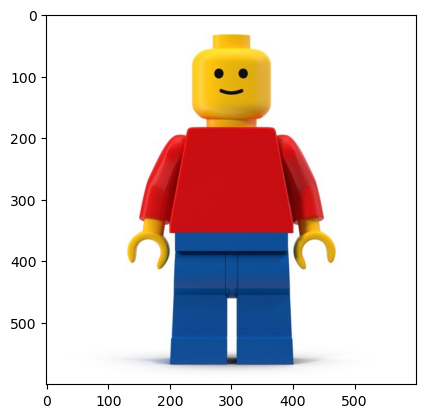

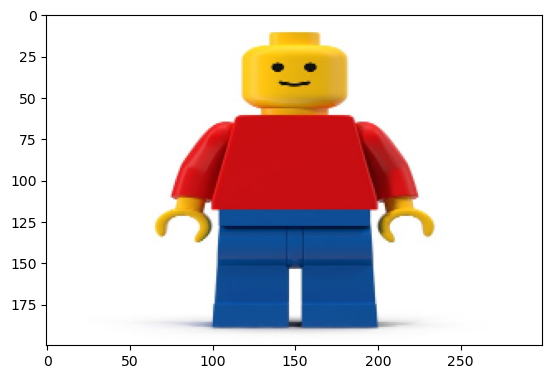

In [4]:
# 이미지 색상 Convert
lego_man_cvt = cv2.cvtColor(lego_man, cv2.COLOR_BGR2RGB)

# 이미지 크기 조절 >> (600,600) to (300,200)
image_resize = cv2.resize(lego_man_cvt,(300,200))

# 이미지 크기 확인
image_height_resize, image_width_resize, _ = image_resize.shape
print('Resize Height >> ', image_height_resize)
print('Resize Width >> ', image_width_resize)

# 원본 vs 리사이즈
plt.imshow(lego_man_cvt)
plt.show()
plt.imshow(image_resize)
plt.show()

##### 02_03 이미지 크롭

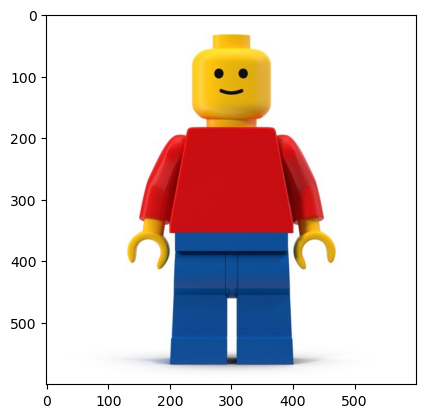

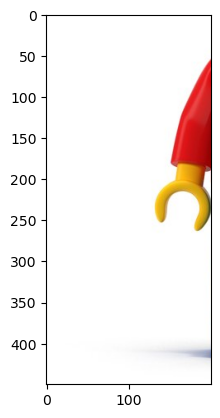

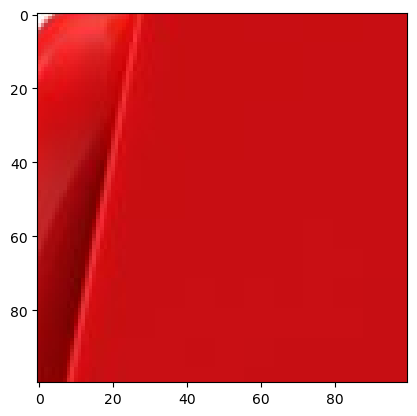

In [5]:
# 이미지 크롭
image_cropped = lego_man_cvt[150:,:200]

# 이미지 좌표 크롭
x1, y1 = 200, 200
x2, y2 = 300, 300
image_cropped_xy = lego_man_cvt[x1:x2,y1:y2]

# 원본 vs 크롭 vs 좌표
plt.imshow(lego_man_cvt)
plt.show()

plt.imshow(image_cropped)
plt.show()

plt.imshow(image_cropped_xy)
plt.show()

##### 02_04 이미지 Blur

[[0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125]]


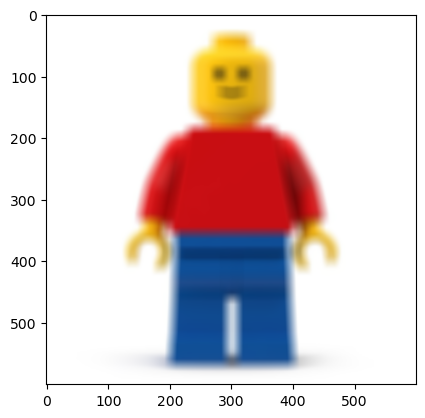

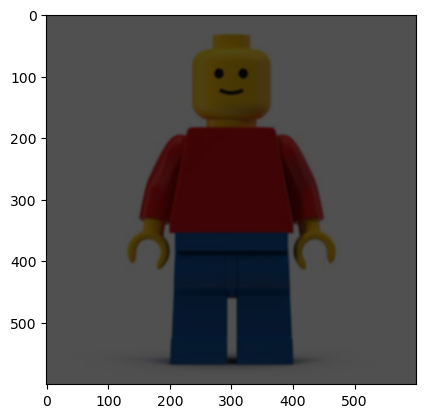

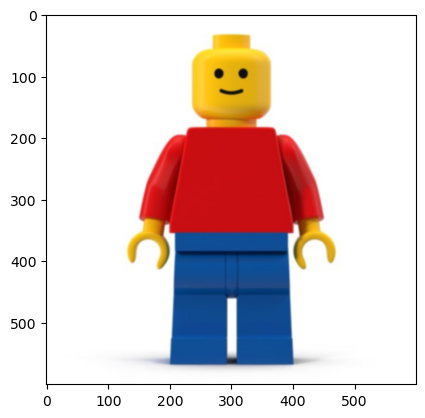

In [6]:
# Blur
image_blur = cv2.blur(lego_man_cvt, (20,20))

# 커널 직접 정의, filter2D()
kernel_blur = np.ones((5,5))/80.0
print(kernel_blur)
image_kernel_blur = cv2.filter2D(lego_man_cvt, -1, kernel_blur)

# Gaussian Blur
image_GB = cv2.GaussianBlur(lego_man_cvt, (5,5), 0)

plt.imshow(image_blur)
plt.show()

plt.imshow(image_kernel_blur)
plt.show()

plt.imshow(image_GB)
plt.show()

##### 02_04 이미지 Shapren

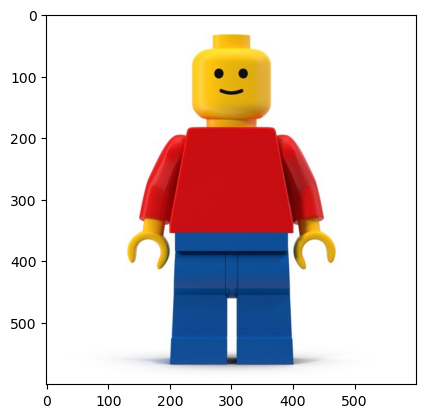

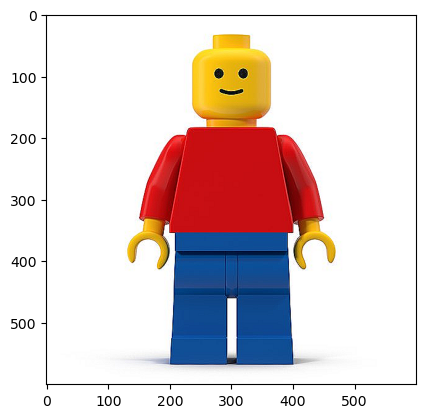

In [7]:
kernel_sharp = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

image_sharp = cv2.filter2D(lego_man_cvt, -1, kernel_sharp)

plt.imshow(lego_man_cvt)
plt.show()

plt.imshow(image_sharp)
plt.show()

#### 02_05 이미지 대비 높이기 : equalize Hist

##### Gray Scale

In [8]:
lego_man_cvt_gray = cv2.cvtColor(lego_man, cv2.COLOR_BGR2GRAY)

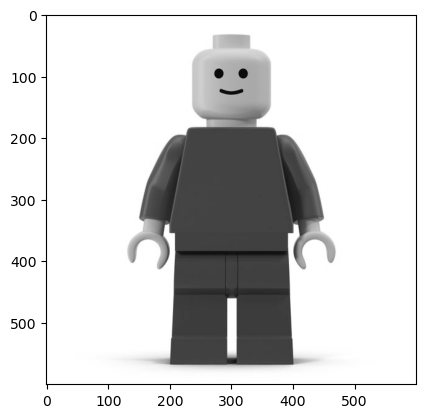

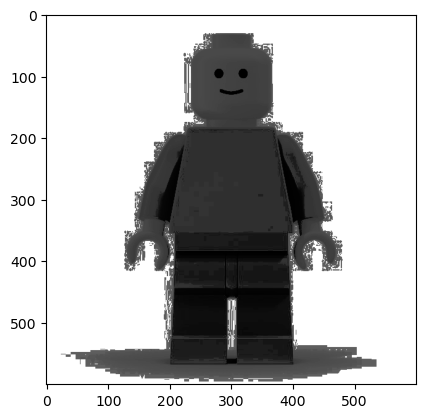

In [9]:
image_enhanced = cv2.equalizeHist(lego_man_cvt_gray)

plt.imshow(lego_man_cvt_gray, 'gray')
plt.show()

plt.imshow(image_enhanced, 'gray')
plt.show()

#### Color Scale

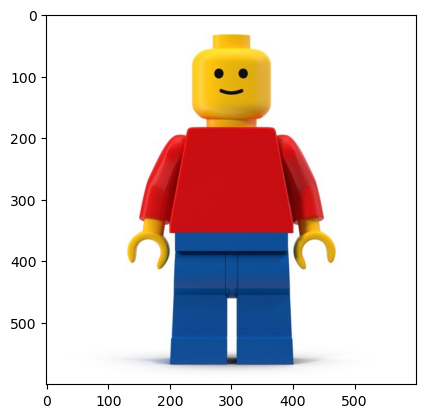

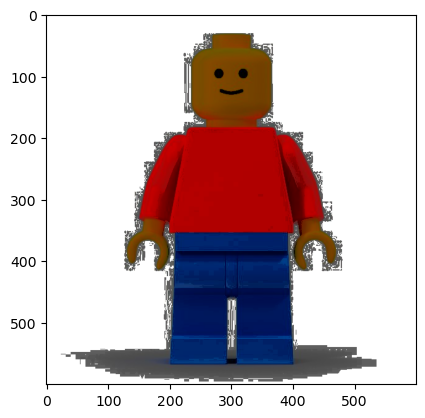

In [10]:
lego_man_cvt_yuv = cv2.cvtColor(lego_man, cv2.COLOR_BGR2YUV)

lego_man_cvt_yuv[:,:,0] = cv2.equalizeHist(lego_man_cvt_yuv[:,:,0])

lego_man_rgb = cv2.cvtColor(lego_man_cvt_yuv, cv2.COLOR_YUV2RGB)

plt.imshow(lego_man_cvt)
plt.show()

plt.imshow(lego_man_rgb)
plt.show()

#### 02_06 이미지 이진화

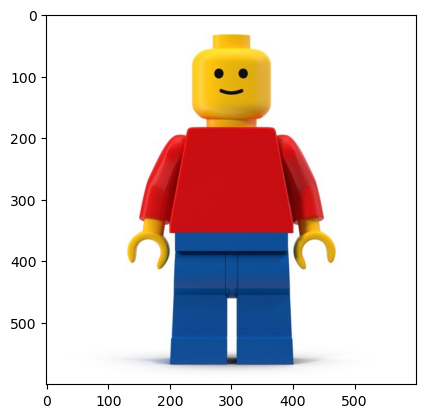

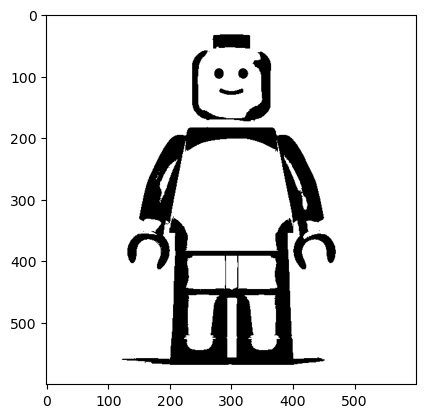

In [25]:
max_output_value = 255
neighbor_size = 99
substract_from_mean = 10
image_binary = cv2.adaptiveThreshold(
    lego_man_cvt_gray,
    max_output_value,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    neighbor_size,
    substract_from_mean
)

plt.imshow(lego_man_cvt, 'gray')
plt.show()

plt.imshow(image_binary, 'gray')
plt.show()

#### 02_06 이미지 회전

##### 시계 방향

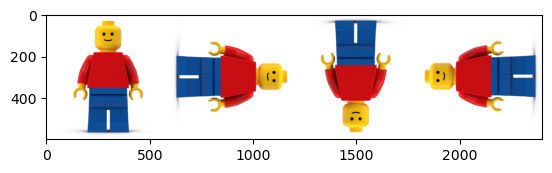

In [19]:
rotaion = np.hstack([
lego_man_cvt,
cv2.rotate(lego_man_cvt, cv2.ROTATE_90_CLOCKWISE),
cv2.rotate(lego_man_cvt, cv2.ROTATE_180),
cv2.rotate(lego_man_cvt, cv2.ROTATE_90_COUNTERCLOCKWISE)
])

plt.imshow(rotaion)
plt.show()

##### 대칭

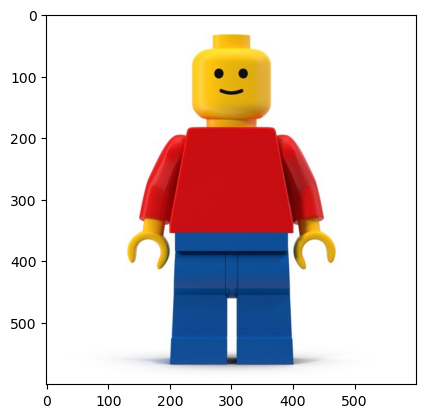

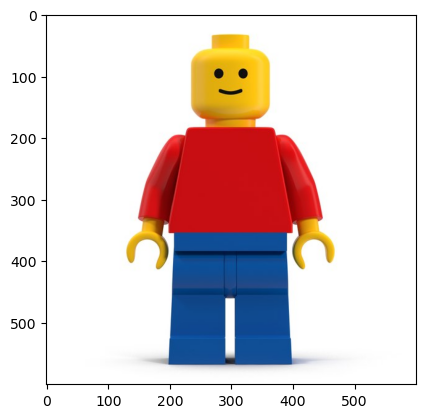

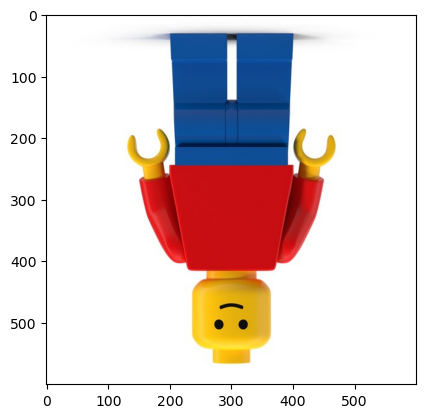

In [31]:
image_filp_1 = cv2.flip(lego_man_cvt, 1)
image_filp_2 = cv2.flip(lego_man_cvt, 0)

plt.imshow(lego_man_cvt)
plt.show()

plt.imshow(image_filp_1)
plt.show()

plt.imshow(image_filp_2)
plt.show()

02_07 배경제거

In [35]:
%pip install opencv-python==4.5.5.64

Note: you may need to restart the kernel to use updated packages.


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


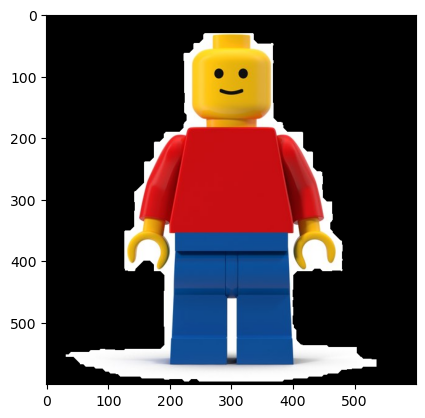

In [61]:
rectangle = (0,0,600,599)

mask = np.zeros(lego_man_cvt.shape[:2], np.uint8)
print(mask)

bgModel = np.zeros((1,65),np.float64)
fgModel = np.zeros((1,65),np.float64)

cv2.grabCut(lego_man_cvt, mask, rectangle, bgModel, fgModel,6,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2) | (mask==0),0,1).astype('uint8')

lego_man_cvt_nobg = lego_man_cvt * mask2[:,:,np.newaxis]

plt.imshow(lego_man_cvt_nobg)
plt.show()

#### 02_08 경계선 감지

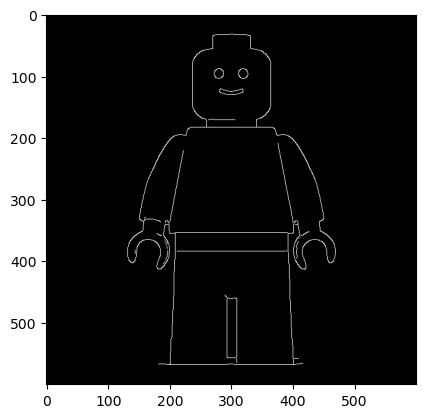

In [65]:
median_intensity = np.median(lego_man_cvt)
lower_threshold = int(max(0,(1.0 -0.35) * median_intensity))
upper_threshold = int(min(255,(1.0 + 0.35) * median_intensity))

image_canny = cv2.Canny(lego_man_cvt, lower_threshold, upper_threshold)

plt.imshow(image_canny, 'gray')
plt.show()


#### 02_09 모서리 감지

4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.428896750842484e+34
4.42889675

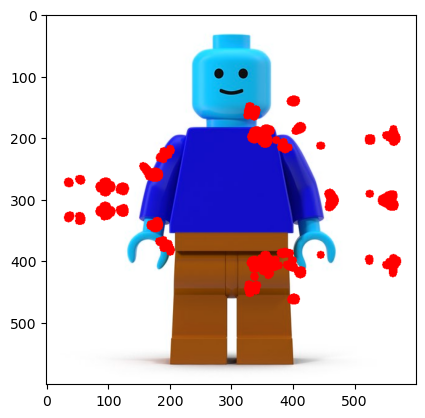

In [85]:
import cv2

block_size = 4
aperture = 29
free_parameter = 0.04

image_gray = np.float32(lego_man_cvt_gray)

detector_response = cv2.cornerHarris(
    image_gray,
    block_size,
    aperture,
    free_parameter
)

detector_response = cv2.dilate(detector_response, None)

threshold = 0.01
for i in range(detector_response.shape[0]):
    for j in range(detector_response.shape[1]):
        if detector_response[i,j] > threshold * detector_response.max():
            print(threshold * detector_response.max())
            cv2.circle(lego_man_cvt, [i,j], radius=5, color=(0,0,255), thickness=-1)
            
image = cv2.cvtColor(lego_man_cvt, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()